In [17]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image as im
from scipy.ndimage import interpolation as inter
import cv2

from IPython.display import display

# Helper functions

In [28]:
def load_img(url, show=False):
    img = im.open(url)
    display(img)
    return img

    
def conver_to_binary(img):
    wd, ht = img.size
    pix = np.array(img.convert("1").getdata(), np.uint8)
    
    bin_img = 1 - (pix.reshape((ht, wd)) / 255.0)
    return bin_img


def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score

def skew_correctness(img):
    delta = 1
    limit = 360

    angles = np.arange(-limit, limit + delta, delta)
    scores = []
    
    for angle in angles:
        hist, score = find_score(img, angle)
        scores.append(score)
        
    best_score = max(scores)
    best_angle = angles[scores.index(best_score)]
    
    data = inter.rotate(bin_img, best_angle, reshape=False, order=0)
    
    return data

# Segmetation

Is nothing but the breaking the whole image into subparts to process them further

Segmentation of image is done in the following sequence :
- → Line level Segmentation
- → Word level Segmentation
- → Character level Segmentation

### Horizontal Histogram Projection: 

In this method, we count the No.of foreground pixels along the rows of the image, and the resultant array is of the size equal to No.of rows in the image (Height of the image).

### Image Pre-processing

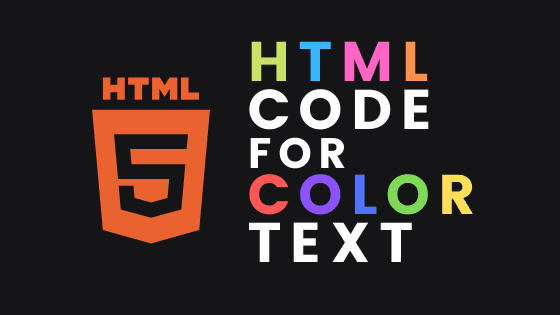

In [29]:
# load image
img = load_img("img_new.png", show=True)

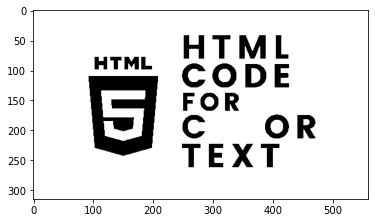

In [30]:
bin_img = conver_to_binary(img)
plt.imshow(bin_img, cmap="gray")

In [31]:
bin_img

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

## Histogram Projection Method

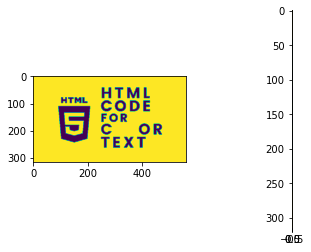

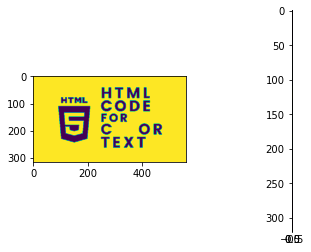

In [43]:
# img be binarized image of size height x width and foregound pixel is white i.e pixel value = 255
horizontal_hist = np.sum(bin_img, axis=1, keepdims=True) / 255
plt.subplot(121), plt.imshow(bin_img)
plt.subplot(122), plt.imshow(horizontal_hist)
plt.show()


# axis = 1 is used to take sum along the row
# horizontal_hist is an array of size height x 1

# If the img has foreground pixel as black i.e pixel value = 0
horizontal_hist = bin_img.shape[1] - np.sum(bin_img, axis=1, keepdims=True) / 255
plt.subplot(121), plt.imshow(bin_img)
plt.subplot(122), plt.imshow(horizontal_hist)
plt.show()

# Logic :- No.of columns - No.of white pixels

In [40]:
horizontal_hist.shape

(315, 1)